In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re



In [35]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re

def load_all_aggregated_data() -> dict:
    """Load all aggregated data for various configurations: input dimensions, pseudo rehearsal, and optimizer.
    
    Returns:
    - all_data (dict): A nested dictionary with keys as input dimensions, pseudorehearsal, and optimizer 
                       and values as the loaded data.
    """
    all_data = {}
    save_folder = "aggregated_results"
    
    # Get all files in the folder with the .npy extension
    files = [f for f in os.listdir(save_folder) if f.endswith(".npy")]

    # Extract the configuration details from the file name using regex
    pattern = re.compile(r"input_dim_(\d+)_(True|False)_(\w+).npy")

    for file in files:
        match = pattern.match(file)
        if match:
            dim = int(match.group(1))
            pseudo_rehearsal = True if match.group(2) == 'True' else False
            optimizer = match.group(3)
            
            if dim not in all_data:
                all_data[dim] = {}
            
            if pseudo_rehearsal not in all_data[dim]:
                all_data[dim][pseudo_rehearsal] = {}
            
            save_path = os.path.join(save_folder, file)
            data = np.load(save_path, allow_pickle=True).item()
            all_data[dim][pseudo_rehearsal][optimizer] = data

    return all_data 

def get_perturbation_labels(output_dim: int = 1,
                            hidden_units_wide: int = 1000,
                            hidden_units_deep: int = 16,
                            hidden_layers: int = 8,
                            num_exps: int = 6) -> dict:
    """Generate dictionary of perturbation labels with given configurations."""
    
    model_descriptions = [
        'Linear Model',
        f"Wide ReLU ANN",
        f"Deep ReLU ANN",
        'One Parameter'
    ]

    for partition_num in [1, 2, 4, 8, 10]:
        model_descriptions.extend([
            f"Spline ANN (z={partition_num})",
            f"Lookup Table (z={partition_num})",
            f"ABEL-Spline (z={partition_num})"
        ])

    # Model perturbation labels
    perturbation_labels = {f"model_{i}_perturbations": desc for i, desc in enumerate(model_descriptions)}
    
    # Adding the distance labels
    perturbation_labels["min_distance"] = "Min Absolute Difference"
    perturbation_labels["max_distance"] = "Max Absolute Difference"

    return perturbation_labels

def create_nested_dataframe_dict(loaded_data_dict: dict) -> dict:
    """Create a nested dictionary of pandas DataFrames using loaded data."""
    return {
        dim: {
            pseudo: {
                optimizer: pd.DataFrame(data)
                for optimizer, data in optimizer_data.items()
            }
            for pseudo, optimizer_data in pseudo_rehearsal_data.items()
        }
        for dim, pseudo_rehearsal_data in loaded_data_dict.items()
    }


# Example usage:
perturbation_labels_dict = get_perturbation_labels()
for key, value in perturbation_labels_dict.items():
    print(f"{key} -> {value}")

# Example usage:
perturb_data_dict = load_all_aggregated_data()
#for dim, pseudo_rehearsal_data in loaded_data_dict.items():
#    for pseudo, optimizer_data in pseudo_rehearsal_data.items():
#        for optimizer, data in optimizer_data.items():
#            print(f"Data for dimension {dim}, pseudorehearsal: {pseudo}, 
# optimizer: {optimizer} has keys: \n\n {data.keys()} \n\n")

# Example usage:
#df_dict = create_nested_dataframe_dict(loaded_data_dict)

model_0_perturbations -> Linear Model
model_1_perturbations -> Wide ReLU ANN
model_2_perturbations -> Deep ReLU ANN
model_3_perturbations -> One Parameter
model_4_perturbations -> Spline ANN (z=1)
model_5_perturbations -> Lookup Table (z=1)
model_6_perturbations -> ABEL-Spline (z=1)
model_7_perturbations -> Spline ANN (z=2)
model_8_perturbations -> Lookup Table (z=2)
model_9_perturbations -> ABEL-Spline (z=2)
model_10_perturbations -> Spline ANN (z=4)
model_11_perturbations -> Lookup Table (z=4)
model_12_perturbations -> ABEL-Spline (z=4)
model_13_perturbations -> Spline ANN (z=8)
model_14_perturbations -> Lookup Table (z=8)
model_15_perturbations -> ABEL-Spline (z=8)
model_16_perturbations -> Spline ANN (z=10)
model_17_perturbations -> Lookup Table (z=10)
model_18_perturbations -> ABEL-Spline (z=10)
min_distance -> Min Absolute Difference
max_distance -> Max Absolute Difference


In [69]:
perturbation_labels_dict.keys()

dict_keys(['model_0_perturbations', 'model_1_perturbations', 'model_2_perturbations', 'model_3_perturbations', 'model_4_perturbations', 'model_5_perturbations', 'model_6_perturbations', 'model_7_perturbations', 'model_8_perturbations', 'model_9_perturbations', 'model_10_perturbations', 'model_11_perturbations', 'model_12_perturbations', 'model_13_perturbations', 'model_14_perturbations', 'model_15_perturbations', 'model_16_perturbations', 'model_17_perturbations', 'model_18_perturbations', 'min_distance', 'max_distance'])

In [36]:
perturb_data_dict[1][False]['adam']['model_0_perturbations']

array([0.65062225, 0.21534252, 0.52328193, ..., 0.30434477, 0.25704533,
       0.14038728], dtype=float32)

In [78]:
model_lists = ['model_0_perturbations', 
               'model_1_perturbations', 'model_2_perturbations', 
               'model_3_perturbations', 'model_4_perturbations', 'model_5_perturbations', 
               'model_6_perturbations', 'model_7_perturbations', 'model_8_perturbations', 
               'model_9_perturbations', 'model_10_perturbations', 'model_11_perturbations', 
               'model_12_perturbations', 'model_13_perturbations', 'model_14_perturbations', 
               'model_15_perturbations', 
               'model_16_perturbations', 'model_17_perturbations', 'model_18_perturbations']


In [79]:
sgd_list = []

for dim in range(1,7):
    for model_index in model_lists:
        sgd_list.append(perturb_data_dict[dim][False]['sgd'][model_index])
        
sgd_list = np.array(sgd_list).flatten()

adam_list = []

for dim in range(1,7):
    for model_index in model_lists:
        adam_list.append(perturb_data_dict[dim][False]['adam'][model_index])
        
adam_list = np.array(adam_list).flatten()

In [ ]:
sg

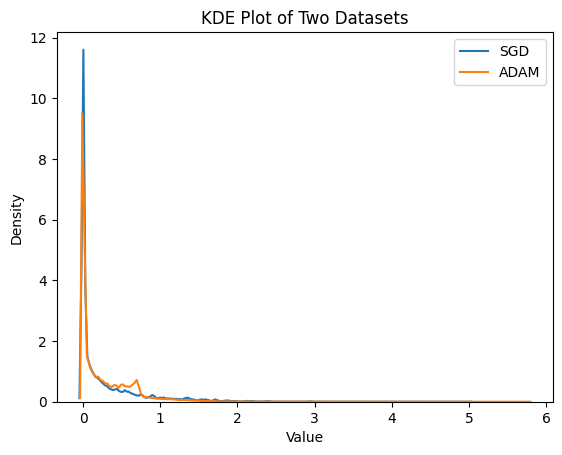

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for dataset1 and dataset2
dataset1 = np.random.normal(0, 1, 1000)
dataset2 = np.random.normal(2, 1, 1000)

'''

# Plot histograms for dataset1 and dataset2
ax.hist(sgd_mean_data, bins=5, alpha=0.5, label='SGD')
ax.hist(adam_mean_data, bins=5, alpha=0.5, label='Adam')

# Set title and labels for axes
ax.set_title('Histogram of Two Datasets')
ax.set_xlabel('Mean Absolute Perturbation Value')
ax.set_ylabel('Frequency')
'''


# Create a figure and axis
fig, ax = plt.subplots()

# Plot KDE plots for dataset1 and dataset2
sns.kdeplot(sgd_list, ax=ax, label='SGD')
sns.kdeplot(adam_list, ax=ax, label='ADAM')

# Set title and labels for axes
ax.set_title('KDE Plot of Two Datasets')
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Add legend to indicate which KDE plot belongs to which dataset
ax.legend()

# Display the plot
plt.show()

In [59]:
import numpy as np

# Initialize the means_stds dictionary
means_stds = {}

# Iterate over pseudo-rehearsal status, optimizer type and dimensions
for pseudo_rehearsal_status in [True, False]:
    for optimizer_type in ['adam', 'sgd']:
        for dim in range(1, 7):
            if dim not in perturb_data_dict:
                continue

            # Formulate dataset name
            pseudo_rehearsal_string = 'Pseudo-Rehearsal' if pseudo_rehearsal_status else 'No Pseudo-Rehearsal'
            dataset_name = f"{optimizer_type.upper()} with {pseudo_rehearsal_string} in {dim}D"
            
            if dataset_name not in means_stds:
                means_stds[dataset_name] = {}

            for model_perturbation in perturb_data_dict[dim][pseudo_rehearsal_status][optimizer_type].keys():
                
                # Get the model name from the label dictionary
                model_name = perturbation_labels_dict[model_perturbation]
                if model_name not in means_stds[dataset_name]:
                    means_stds[dataset_name][model_name] = {}
                
                # Compute mean and standard deviation of the numpy array
                data_array = perturb_data_dict[dim][pseudo_rehearsal_status][optimizer_type][model_perturbation]
                mean_metric = np.mean(data_array)
                std_metric = np.std(data_array)

                # Save them into the dictionary
                means_stds[dataset_name][model_name]['mean'] = mean_metric
                means_stds[dataset_name][model_name]['std'] = std_metric

In [60]:
list(means_stds.keys())

['ADAM with Pseudo-Rehearsal in 1D',
 'ADAM with Pseudo-Rehearsal in 2D',
 'ADAM with Pseudo-Rehearsal in 3D',
 'ADAM with Pseudo-Rehearsal in 4D',
 'ADAM with Pseudo-Rehearsal in 5D',
 'ADAM with Pseudo-Rehearsal in 6D',
 'SGD with Pseudo-Rehearsal in 1D',
 'SGD with Pseudo-Rehearsal in 2D',
 'SGD with Pseudo-Rehearsal in 3D',
 'SGD with Pseudo-Rehearsal in 4D',
 'SGD with Pseudo-Rehearsal in 5D',
 'SGD with Pseudo-Rehearsal in 6D',
 'ADAM with No Pseudo-Rehearsal in 1D',
 'ADAM with No Pseudo-Rehearsal in 2D',
 'ADAM with No Pseudo-Rehearsal in 3D',
 'ADAM with No Pseudo-Rehearsal in 4D',
 'ADAM with No Pseudo-Rehearsal in 5D',
 'ADAM with No Pseudo-Rehearsal in 6D',
 'SGD with No Pseudo-Rehearsal in 1D',
 'SGD with No Pseudo-Rehearsal in 2D',
 'SGD with No Pseudo-Rehearsal in 3D',
 'SGD with No Pseudo-Rehearsal in 4D',
 'SGD with No Pseudo-Rehearsal in 5D',
 'SGD with No Pseudo-Rehearsal in 6D']

In [61]:
means_stds['ADAM with No Pseudo-Rehearsal in 1D']['ABEL-Spline (z=1)']['mean']

0.5082639

In [62]:
means_stds['SGD with No Pseudo-Rehearsal in 1D']['ABEL-Spline (z=1)']['mean']

0.3049194

In [63]:
adam_experiments = ['ADAM with No Pseudo-Rehearsal in 1D',
 'ADAM with No Pseudo-Rehearsal in 2D',
 'ADAM with No Pseudo-Rehearsal in 3D',
 'ADAM with No Pseudo-Rehearsal in 4D',
 'ADAM with No Pseudo-Rehearsal in 5D',
 'ADAM with No Pseudo-Rehearsal in 6D']

sgd_experiments = ['SGD with No Pseudo-Rehearsal in 1D',
 'SGD with No Pseudo-Rehearsal in 2D',
 'SGD with No Pseudo-Rehearsal in 3D',
 'SGD with No Pseudo-Rehearsal in 4D',
 'SGD with No Pseudo-Rehearsal in 5D',
 'SGD with No Pseudo-Rehearsal in 6D']

In [64]:
model_lists = ['Linear Model', 
 'Wide ReLU ANN', 
 'Deep ReLU ANN', 
 'Spline ANN (z=1)', 
 'Lookup Table (z=1)', 
 'ABEL-Spline (z=1)', 
 'Spline ANN (z=2)', 
 'Lookup Table (z=2)', 
 'ABEL-Spline (z=2)', 'Spline ANN (z=4)', 'Lookup Table (z=4)', 'ABEL-Spline (z=4)', 
 'Spline ANN (z=8)', 'Lookup Table (z=8)', 'ABEL-Spline (z=8)', 'Spline ANN (z=10)', 
 'Lookup Table (z=10)', 'ABEL-Spline (z=10)']

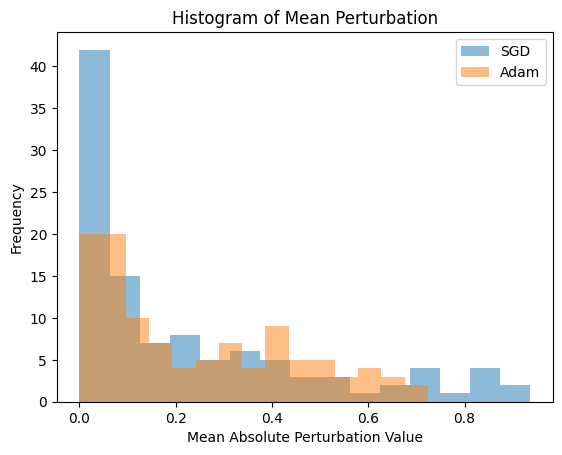

In [65]:
sgd_mean_data = []

for dataset_index in sgd_experiments:
    dictionary_a = means_stds[dataset_index]
    #print(dictionary_a.keys())
    for key in model_lists:
        sgd_mean_data.append(dictionary_a[key]['mean'])
        
perturb_data_dict[1][False]['adam']['model_0_perturbations']
        
adam_mean_data = []

for dataset_index in adam_experiments:
    dictionary_a = means_stds[dataset_index]
    for key in model_lists:
        adam_mean_data.append(dictionary_a[key]['mean'])
        
import numpy as np
import matplotlib.pyplot as plt

# Sample data for dataset1 and dataset2
dataset1 = np.random.normal(0, 1, 1000)
dataset2 = np.random.normal(2, 1, 1000)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot histograms for dataset1 and dataset2
ax.hist(sgd_mean_data, bins=15, alpha=0.5, label='SGD')
ax.hist(adam_mean_data, bins=15, alpha=0.5, label='Adam')

# Set title and labels for axes
ax.set_title('Histogram of Mean Perturbation')
ax.set_xlabel('Mean Absolute Perturbation Value')
ax.set_ylabel('Frequency')

# Add legend to indicate which histogram belongs to which dataset
ax.legend()

# Display the plot
plt.show()

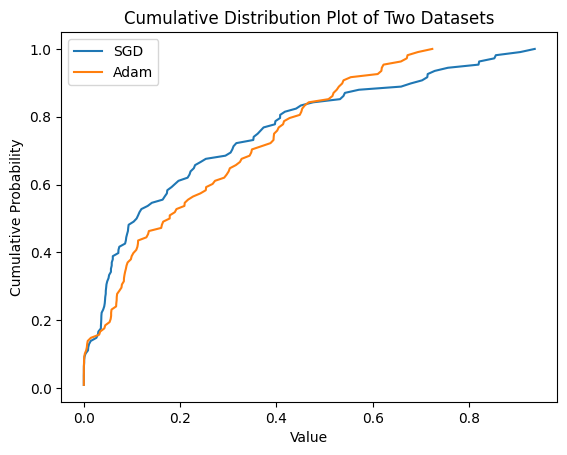

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for dataset1 and dataset2
dataset1 = sgd_mean_data #np.random.normal(0, 1, 1000)
dataset2 = adam_mean_data #np.random.normal(2, 1, 1000)

# Sort the datasets
sorted_dataset1 = np.sort(dataset1)
sorted_dataset2 = np.sort(dataset2)

# Calculate cumulative probabilities
cumulative_probabilities = np.arange(1, len(sorted_dataset1) + 1) / len(sorted_dataset1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot cumulative distribution plots for dataset1 and dataset2
ax.plot(sorted_dataset1, cumulative_probabilities, label='SGD')
ax.plot(sorted_dataset2, cumulative_probabilities, label='Adam')

# Set title and labels for axes
ax.set_title('Cumulative Distribution of Mean Perturbation')
ax.set_xlabel('Mean Absolute Perturbation Value')
ax.set_ylabel('Cumulative Probability')

# Add legend to indicate which plot belongs to which dataset
ax.legend()

# Display the plot
plt.show()

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data for dataset1 and dataset2
dataset1 = sgd_mean_data  # np.random.normal(0, 1, 1000)
dataset2 = adam_mean_data  # np.random.normal(2, 1, 1000)

# Calculate smoothed cumulative probabilities using Gaussian KDE
kde_dataset1 = gaussian_kde(dataset1)
kde_dataset2 = gaussian_kde(dataset2)

x_values = np.linspace(min(min(dataset1), min(dataset2)), max(max(dataset1), max(dataset2)), 1000)
cumulative_probabilities_dataset1 = kde_dataset1.integrate_box_1d(min(x_values), x_values)
cumulative_probabilities_dataset2 = kde_dataset2.integrate_box_1d(min(x_values), x_values)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot cumulative distribution plots for dataset1 and dataset2
ax.plot(x_values, cumulative_probabilities_dataset1, label='SGD')
ax.plot(x_values, cumulative_probabilities_dataset2, label='Adam')

# Set title and labels for axes
ax.set_title('Smoothed Cumulative Distribution of Mean Perturbation')
ax.set_xlabel('Mean Absolute Perturbation Value')
ax.set_ylabel('Cumulative Probability')

# Add legend to indicate which plot belongs to which dataset
ax.legend()

# Display the plot
plt.show()

ValueError: operands could not be broadcast together with shapes (1000,) (1,108) 

In [53]:
model_lists_relu_anns = ['Wide ReLU ANN', 
 'Deep ReLU ANN']

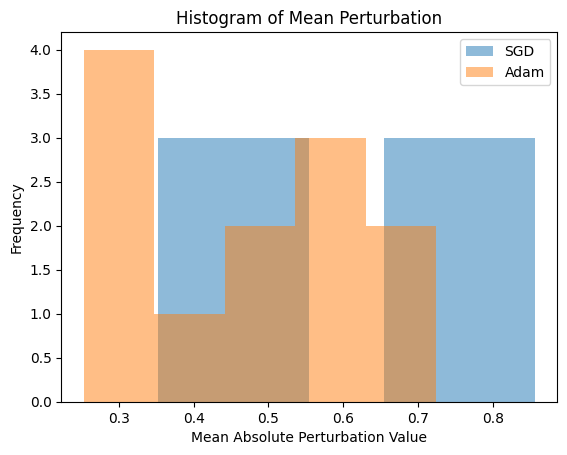

In [55]:
sgd_mean_data = []

for dataset_index in sgd_experiments:
    dictionary_a = means_stds[dataset_index]
    #print(dictionary_a.keys())
    for key in model_lists_relu_anns:
        sgd_mean_data.append(dictionary_a[key]['mean'])
        
adam_mean_data = []

for dataset_index in adam_experiments:
    dictionary_a = means_stds[dataset_index]
    for key in model_lists_relu_anns:
        adam_mean_data.append(dictionary_a[key]['mean'])
        
import numpy as np
import matplotlib.pyplot as plt

# Sample data for dataset1 and dataset2
dataset1 = np.random.normal(0, 1, 1000)
dataset2 = np.random.normal(2, 1, 1000)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot histograms for dataset1 and dataset2
ax.hist(sgd_mean_data, bins=5, alpha=0.5, label='SGD')
ax.hist(adam_mean_data, bins=5, alpha=0.5, label='Adam')

# Set title and labels for axes
ax.set_title('Histogram of Mean Perturbation')
ax.set_xlabel('Mean Absolute Perturbation Value')
ax.set_ylabel('Frequency')

# Add legend to indicate which histogram belongs to which dataset
ax.legend()

# Display the plot
plt.show()

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for dataset1 and dataset2
dataset1 = np.random.normal(0, 1, 1000)
dataset2 = np.random.normal(2, 1, 1000)

# Plot KDE plots for dataset1 and dataset2
sns.kdeplot(sgd_mean_data, ax=ax, label='SGD')
sns.kdeplot(dataset2, ax=ax, label='Adam')

# Set title and labels for axes
ax.set_title('KDE Plot of Two Datasets')
ax.set_xlabel('Mean Absolute Perturbation Value')
ax.set_ylabel('Density')

# Add legend to indicate which KDE plot belongs to which dataset
ax.legend()

# Display the plot
plt.show()

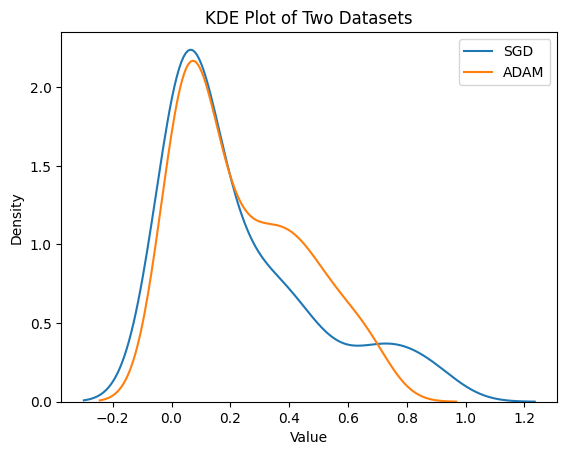

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for dataset1 and dataset2
dataset1 = np.random.normal(0, 1, 1000)
dataset2 = np.random.normal(2, 1, 1000)

'''

# Plot histograms for dataset1 and dataset2
ax.hist(sgd_mean_data, bins=5, alpha=0.5, label='SGD')
ax.hist(adam_mean_data, bins=5, alpha=0.5, label='Adam')

# Set title and labels for axes
ax.set_title('Histogram of Two Datasets')
ax.set_xlabel('Mean Absolute Perturbation Value')
ax.set_ylabel('Frequency')
'''


# Create a figure and axis
fig, ax = plt.subplots()

# Plot KDE plots for dataset1 and dataset2
sns.kdeplot(sgd_mean_data, ax=ax, label='SGD')
sns.kdeplot(adam_mean_data, ax=ax, label='ADAM')

# Set title and labels for axes
ax.set_title('KDE Plot of Two Datasets')
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Add legend to indicate which KDE plot belongs to which dataset
ax.legend()

# Display the plot
plt.show()

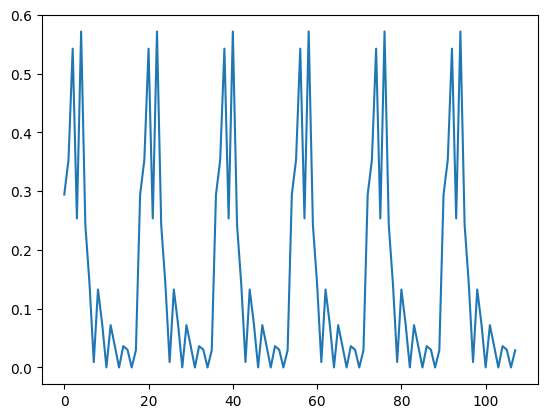

In [30]:
plt.plot(sgd_mean_data)

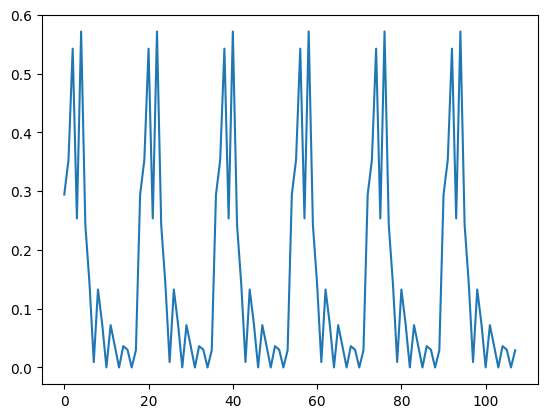

In [31]:
plt.plot(adam_mean_data)

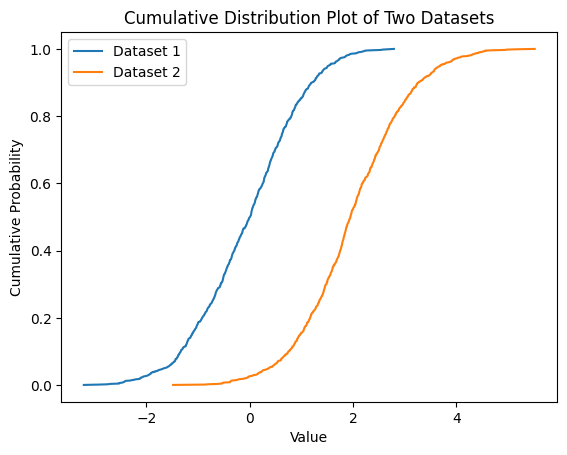

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for dataset1 and dataset2
dataset1 = np.random.normal(0, 1, 1000)
dataset2 = np.random.normal(2, 1, 1000)

# Sort the datasets
sorted_dataset1 = np.sort(dataset1)
sorted_dataset2 = np.sort(dataset2)

# Calculate cumulative probabilities
cumulative_probabilities = np.arange(1, len(sorted_dataset1) + 1) / len(sorted_dataset1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot cumulative distribution plots for dataset1 and dataset2
ax.plot(sorted_dataset1, cumulative_probabilities, label='Dataset 1')
ax.plot(sorted_dataset2, cumulative_probabilities, label='Dataset 2')

# Set title and labels for axes
ax.set_title('Cumulative Distribution Plot of Two Datasets')
ax.set_xlabel('Value')
ax.set_ylabel('Cumulative Probability')

# Add legend to indicate which plot belongs to which dataset
ax.legend()

# Display the plot
plt.show()